In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
print('import successful')

import successful


In [2]:
import scvelo as scv
scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.figdir= ''
scv.settings.set_figure_params(dpi_save=300, vector_friendly=False)

Running scvelo 0.3.2 (python 3.10.15) on 2025-06-20 14:21.


In [16]:
###global variable###
dataset = 'M-MG'
ad_path = f'../1.subset/{dataset}_cleaned.h5ad'
#ad_path = f'../1.subset/{dataset}_for_DEG.h5ad'
use_dynamic_method=False
run_score=True
PCs=20
n_neighbors=30
n_top_genes=3000
drop_cells=False
droplist=['Lum-Cd74','Lum-Adipoq']

In [5]:
###funciton###

In [6]:
def run_plotly(adata,dataset):
    umap_data = pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'])
    umap_data['cell_ids'] = adata.obs.index 
    umap_data['stage'] = adata.obs['stage'] 
    fig = px.scatter(umap_data, x='UMAP1', y='UMAP2', hover_data=['cell_ids', 'stage'],width=800,height=450)
    fig.show()
    fig.write_html(f'{dataset}-interactive_umap_plot.html')

In [18]:
#ad_path="D:/111/M-MG_cleaned.h5ad"

In [19]:
adata1 = ad.read(ad_path)

In [21]:
if drop_cells:
    adata1=adata1[~adata1.obs['newcelltype'].isin(droplist)]
    print(f"drop cells : {droplist}")
else:
    print("skip drop cells")

drop cells : ['Lum-Cd74', 'Lum-Adipoq']


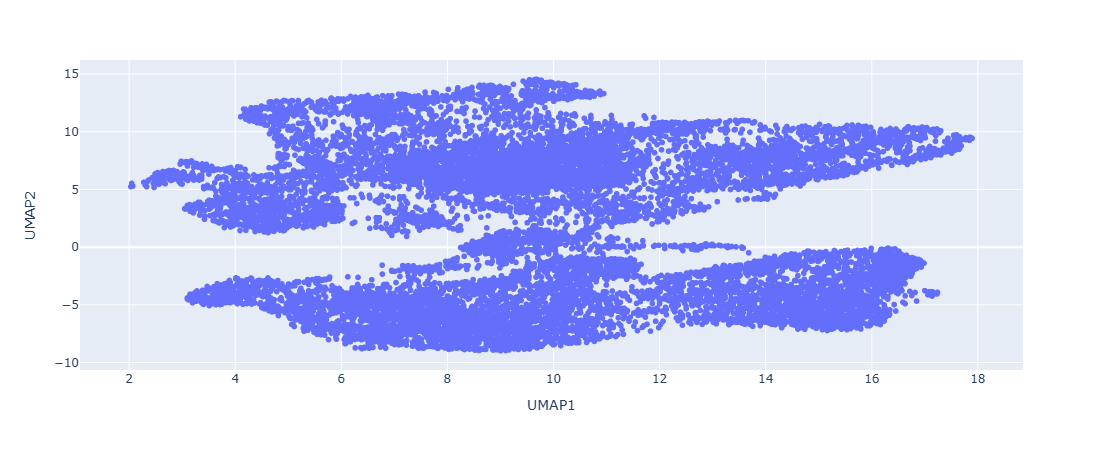

In [22]:
run_plotly(adata1,dataset)

In [ ]:
adata1.X=adata1.layers['counts']

In [23]:
scv.pp.filter_and_normalize(adata1, n_top_genes=n_top_genes)
sc.pp.neighbors(adata1, n_pcs=PCs, n_neighbors=n_neighbors,random_state=42)
scv.pp.moments(adata1, n_pcs=PCs, n_neighbors=n_neighbors)
#adata1.write(f'{dataset}_velo_for_dynamo.h5ad')
#print(f"save velo_for_dynamo file : {dataset}_velo_for_dynamo.h5ad")

Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [24]:
### run velocity ###
if use_dynamic_method:    
    scv.tl.recover_dynamics(adata1)
    scv.tl.velocity(adata1, mode='dynamical')
    print("use mode dynamic")
else:
    scv.tl.velocity(adata1,mode='stochastic')
    print("use default mode stochastic")

computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
use default mode stochastic


In [25]:
scv.tl.velocity_graph(adata1)

computing velocity graph (using 1/16 cores)


  0%|          | 0/14954 [00:00<?, ?cells/s]

    finished (0:01:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:04) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\p

saving figure to file ./M-MG_velo.png


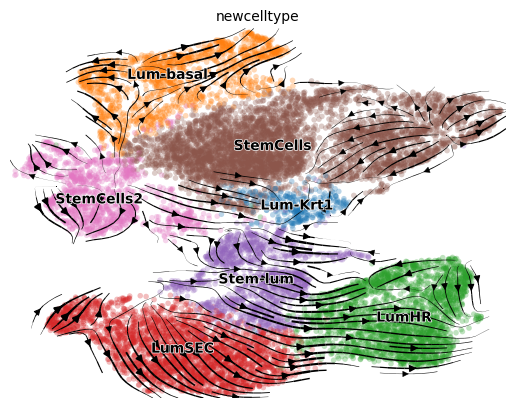

In [26]:
scv.pl.velocity_embedding_stream(adata1, basis='umap',color='newcelltype',save=f'./{dataset}_velo.png')

In [ ]:
#scv.pl.velocity_embedding_stream(adata1, basis='umap',color='newcelltype',save=f'./{dataset}_velo.pdf')

In [ ]:
ax=scv.pl.velocity_embedding_stream(adata1, basis='umap',color='newcelltype',show=False)
fig = ax.get_figure()
# 3️⃣ 递归遍历整张图，能栅格化的都栅格化
for artist in fig.findobj(match=matplotlib.artist.Artist):
    if hasattr(artist, "set_rasterized"):
        artist.set_rasterized(True)

# 4️⃣ 保存；dpi 只影响栅格化元素的分辨率
fig.savefig(f'./{dataset}_velo.pdf',
            dpi=300, bbox_inches="tight", format="pdf")
plt.close(fig)

saving figure to file ./M-MG_proportions.png


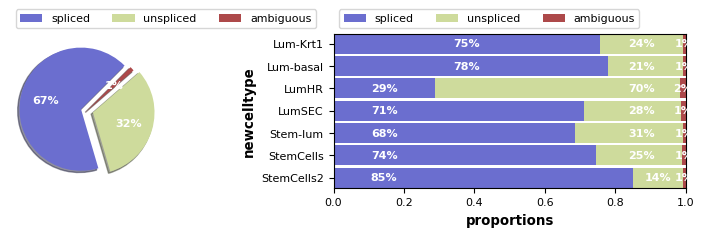

In [27]:
scv.pl.proportions(adata1,groupby='newcelltype',save=f'./{dataset}_proportions.png')

saving figure to file ./M-MG_proportions-leiden.png


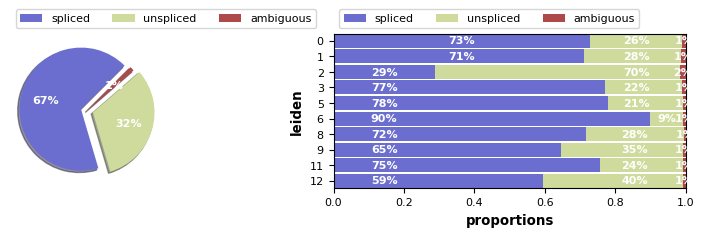

In [28]:
scv.pl.proportions(adata1,groupby='leiden',save=f'./{dataset}_proportions-leiden.png')

In [15]:
adata1.write(f'{dataset}_velofinished.h5ad')
print(f"save velofinished file : {dataset}_velofinished.h5ad")

save velofinished file : M-MG_velofinished.h5ad


calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\p

saving figure to file ./M-MG_cycle.png


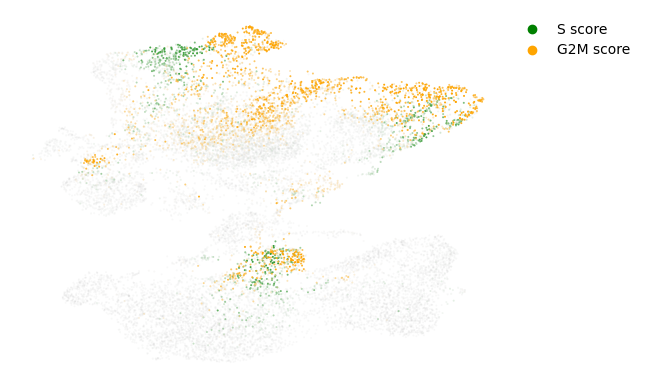

In [29]:
if run_score:
    scv.tl.score_genes_cell_cycle(adata1)
    scv.pl.scatter(adata1, 
                   color_gradients=['S_score', 'G2M_score'], 
                   palette=['green', 'orange'], 
                   smooth=True, perc=[5, 90],
                   save=f'./{dataset}_cycle.png'
                   )

computing terminal states
    identified 6 regions of root cells and 4 regions of end points .
    finished (0:00:03) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\Users\Lenovo\miniconda3\envs\py310\lib\site-packages\scvelo\p

saving figure to file ./M-MG_velo_pseu.png


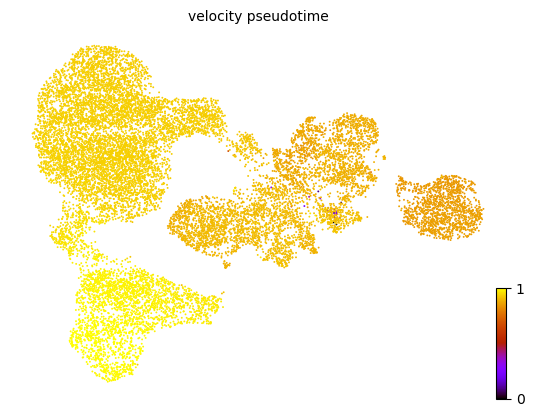

In [17]:
scv.tl.velocity_pseudotime(adata1)
scv.pl.scatter(adata1, color='velocity_pseudotime', cmap='gnuplot',save=f'./{dataset}_velo_pseu.png')

In [18]:
###test code do not run###